In [1]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
# Get the data for the stock ^IBEX
ibex35 = yf.download('^IBEX')
ibex35.to_csv("../input/ibex35.csv",index=True)

[*********************100%%**********************]  1 of 1 completed


In [2]:
# Check DataFrame
ibex35 = pd.read_csv("../input/ibex35.csv",index_col="Date",parse_dates=True)
ibex35.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-07-12,2826.800049,2826.800049,2814.600098,2826.399902,2826.396973,0
1993-07-13,2826.399902,2843.699951,2820.899902,2843.399902,2843.396973,0
1993-07-14,2845.399902,2858.399902,2845.399902,2851.100098,2851.097168,0
1993-07-15,2848.699951,2848.699951,2835.000000,2843.699951,2843.697021,0
1993-07-16,2843.699951,2848.000000,2818.800049,2830.500000,2830.497070,0
1993-07-19,2825.199951,2825.199951,2817.399902,2822.199951,2822.197021,0
1993-07-20,2829.500000,2840.500000,2829.500000,2840.000000,2839.997070,0
1993-07-21,2832.300049,2832.300049,2819.000000,2830.500000,2830.497070,0
1993-07-22,2830.500000,2849.899902,2814.100098,2838.899902,2838.896973,0


In [3]:
# Check DataFrame tail
ibex35.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-09,9182.900391,9223.000000,9111.799805,9151.299805,9151.299805,135294000
2023-10-10,9217.900391,9371.900391,9217.900391,9352.099609,9352.099609,129139100
2023-10-11,9306.799805,9381.700195,9297.500000,9360.400391,9360.400391,108807000
2023-10-12,9403.799805,9434.500000,9322.000000,9336.000000,9336.000000,94383400
2023-10-13,9317.200195,9363.400391,9223.799805,9232.900391,9232.900391,143092900
2023-10-16,9244.799805,9306.000000,9174.200195,9287.099609,9287.099609,105248200
2023-10-17,9268.400391,9323.400391,9219.500000,9298.500000,9298.500000,79826100
2023-10-18,9278.200195,9305.700195,9202.500000,9212.700195,9212.700195,108127200
2023-10-19,9176.799805,9189.700195,9101.099609,9146.799805,9146.799805,143366500


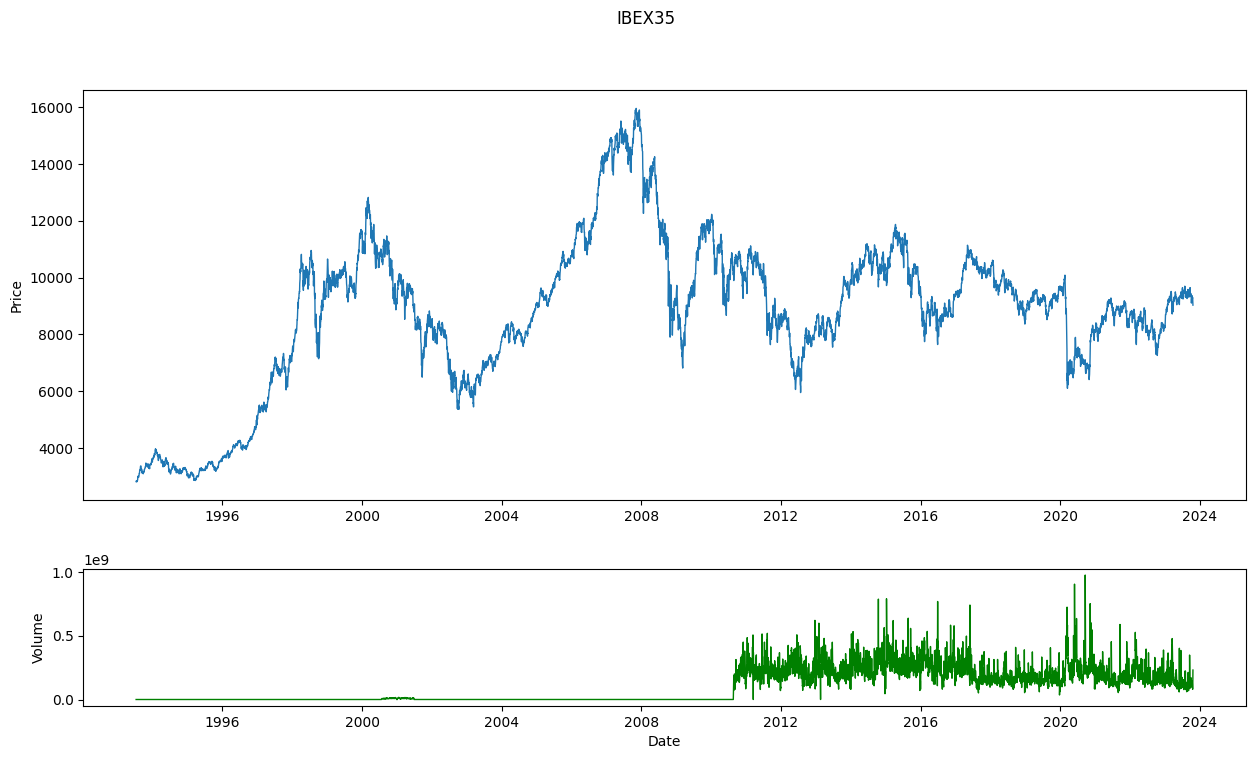

In [4]:
# Plot the adjusted close price of the ^IBEX
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8))

fig.suptitle("IBEX35")
axs[0].set_ylabel('Price')
axs[0].plot(ibex35['Adj Close'],linewidth=1)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(ibex35['Volume'],linewidth=1,color='g')

plt.show()

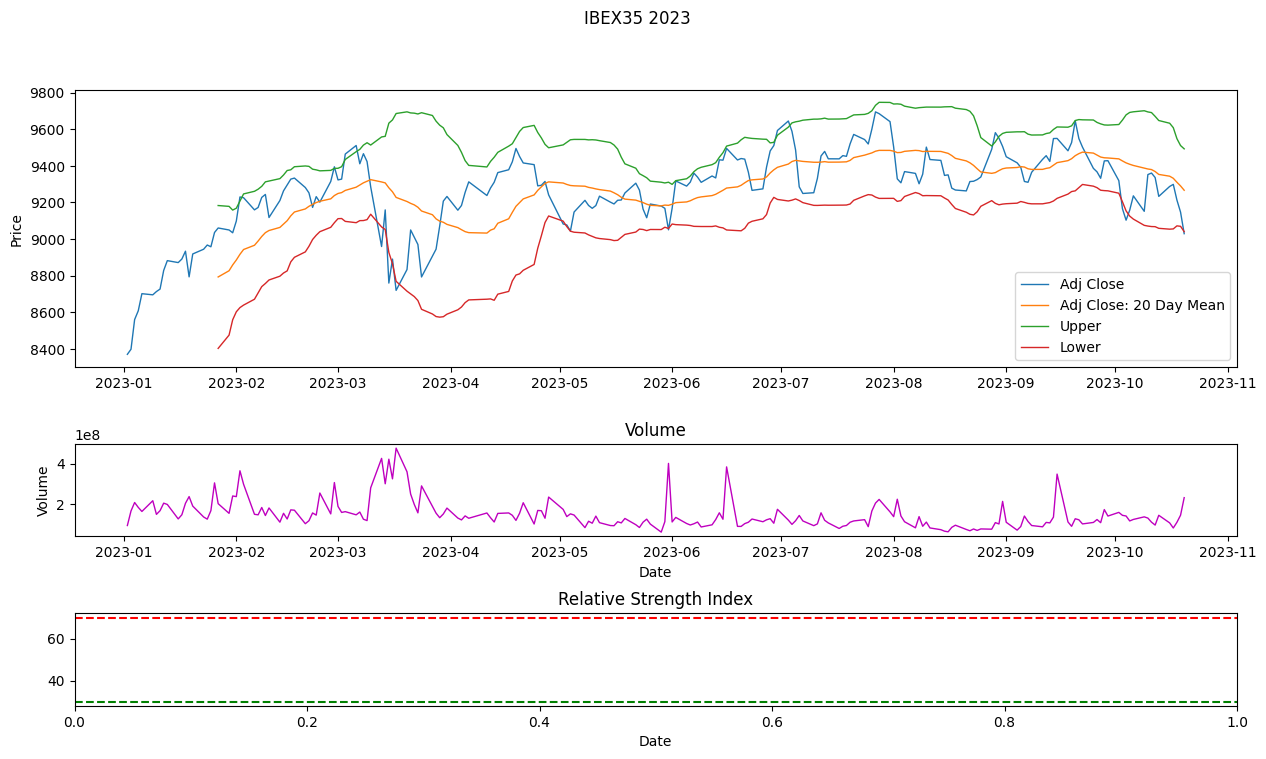

In [14]:
# Plot the adjusted close price of the ^IBEX for 2023
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8))

fig.suptitle("IBEX35 2023")
axs[0].set_ylabel('Price')
axs[0].plot(ibex35['Adj Close'].loc['2023'],linewidth=1)
ibex35['Adj Close: 20 Day Mean'] = ibex35['Adj Close'].loc['2023'].rolling(20).mean() #Adj Close 20 MA
axs[0].plot(ibex35['Adj Close: 20 Day Mean'],linewidth=1) 
ibex35['Upper'] = ibex35['Adj Close: 20 Day Mean'] + 2*(ibex35['Adj Close'].loc['2023'].rolling(20).std()) #Upper Bollinger Band
axs[0].plot(ibex35['Upper'],linewidth=1)
ibex35['Lower'] = ibex35['Adj Close: 20 Day Mean'] - 2*(ibex35['Adj Close'].loc['2023'].rolling(20).std()) #Lower Bollinger Band
axs[0].plot(ibex35['Lower'],linewidth=1)
axs[0].plot()
axs[0].legend(['Adj Close','Adj Close: 20 Day Mean','Upper','Lower'])

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(ibex35['Volume'].loc['2023'],linewidth=1,color='m')

axs[2].set_title('Relative Strength Index')
axs[2].set_xlabel("Date")
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()